Work in progress... 9/21/22

# Start Up

Corona Virus has taken the world by storm, companies had to close due to bankruptcy and many employess lost their job.
Now that the situation are getting better, Start Up Company is looking to improve their operations after the global pandemic.


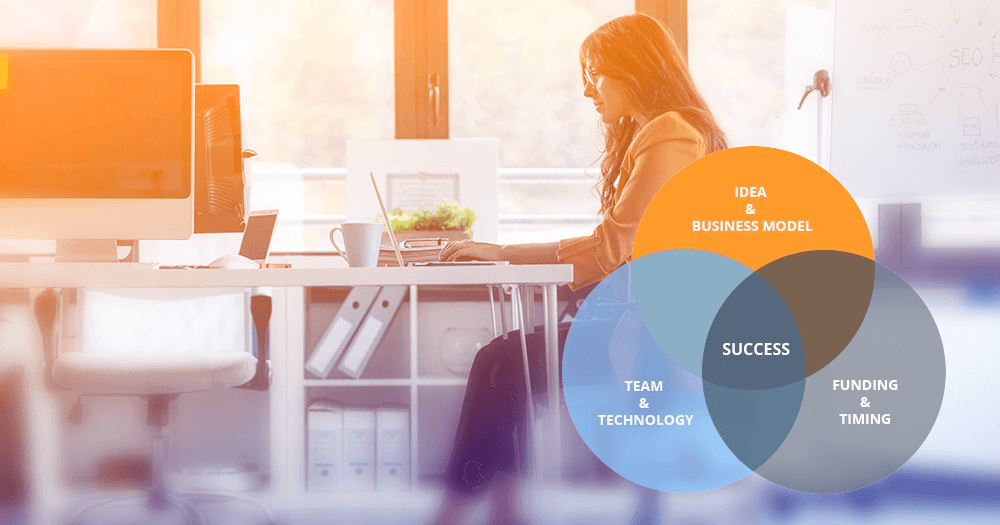

In this project, We will help answer important questions such as:
- Is the company in good financial health?
- Does the company need to let go of any employees?
- Should the company allow employees to work from home permanently?

`Datasets:`
1. finacial_data.csv
2. employees.csv
3. expences.csv


***

Loading necessary python libraries and datsets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('finacial_data.csv')
df2 = pd.read_csv('expenses.csv')
df3 = pd.read_csv('employees.csv')

# Revenue and Expenses
Data analysis on the past six months of the START UP company’s financial data.

In [3]:
print(df1.shape)
df1.head(2)

(6, 3)


,Month,Revenue,Expenses
0,1,1420000,510000
1,2,1200000,532000


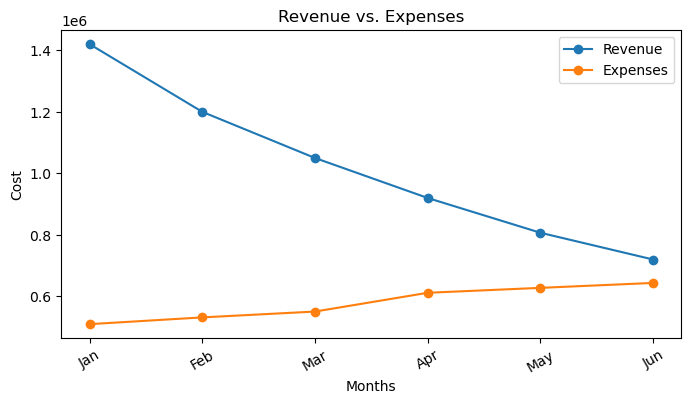

In [4]:
# hide/show code
plt.figure(figsize=(8, 4)) 
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"]
x_values = range(len(months))

ax1 = plt.subplot()
plt.xlabel('Months')
plt.ylabel('Cost')

plt.title('Revenue vs. Expenses')
x_values = range(len(months))
ax1.set_xticks(x_values)
ax1.set_xticklabels(months, rotation=30)
plt.plot(x_values, df1.Revenue, marker= 'o', label='Revenue')
plt.plot(x_values, df1.Expenses, marker= 'o', label='Expenses')

plt.legend()

As shown, revenue seems to be quickly decreasing while expenses are increasing. If the current trend continues, expenses will soon surpass revenues, putting the company at risk. At this rate we should cut our expenses cost.

# Expenses Proportion
Company expenses over the six months.

In [5]:
print(df2.shape)
df2.head(7)

(7, 2)


,Expense,Proportion
0,Salaries,0.62
1,Advertising,0.15
2,Office Rent,0.15
3,Equipment,0.03
4,Utilities,0.03
5,Supples,0.01
6,Food,0.01


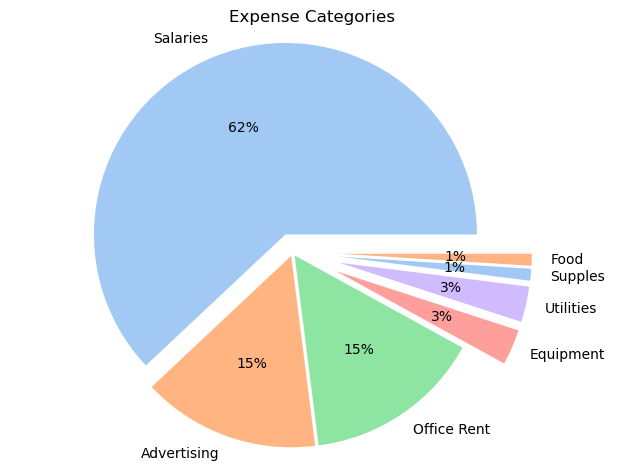

In [6]:
colors = sns.color_palette('pastel')[0:5]
explode = [0.1, 0.02, 0.02, 0.25, 0.25, 0.25, 0.25]

plt.pie(df2.Proportion, 
        labels = df2.Expense,
        autopct='%.0f%%',
        colors=colors,
        explode=explode
       )


plt.title('Expense Categories')
plt.axis('Equal')
plt.tight_layout()

It seems that Salaries, Advertising, and Office Rent make up most of the expenses, while the rest of the categories make up a small percentage. Salaries make up a majority of the expenses, so this is the category that the START UP company should focus on in order to cut costs in a meaningful way.

# Employee Productivity
Salaries make up 62% of expenses. To cut expenses costs in a meaningful way, we must let go of some employees.

Each employee is assigned a productivity score based on their work. We would like to keep the most highly productive employees and let go of the least productive employees. :(

In [7]:
print(df3.shape)
df3.head(3)

(300, 4)


,Name,Salary,Productivity,Commute Time
0,Mason Pender,87902,29.91,16.79
1,Mia Rew,95672,49.91,44.48
2,Jalisa Kroenke,177864,78.00,19.40


Employee's record sorted by productivity score.

In [8]:
df3_sorted = df3.sort_values(by=['Productivity'])
df3_sorted.head(3)

,Name,Salary,Productivity,Commute Time
259,Wilber Rye,111647,0.06,49.42
92,Fredric Gandee,154469,0.24,22.48
252,Johnson Fordham,168684,1.46,22.39


<AxesSubplot:xlabel='Productivity', ylabel='Count'>

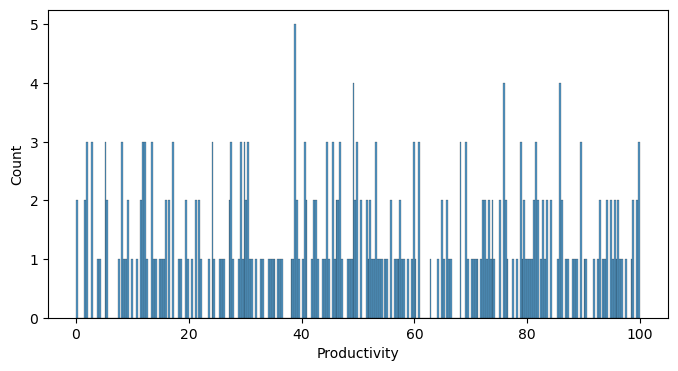

In [9]:
plt.figure(figsize=(8, 4)) 
# set bin to 300, each bin represent each employee productivity score
sns.histplot(x = df3_sorted.Productivity, bins=300) 

### Categorized Productivity

Distribution of Empoyee's Productivity scores indicates that our data is very consistent. The count frequency of on each score is very similar to each others. Now we can divide our productivity score into four level:

1. very_low (<=25)
2. low (26-50)
3. medium (51-75)
4. high (>=76)

In [10]:
bins = [0, 25, 50, 75, 100]
bins_name = ['very_low (<=25)', 'low (26-50)', 'medium (51-75)', 'high (>=76)']

df3['binned_productivity'] = pd.cut(df3['Productivity'], bins, labels = bins_name)

# make sure that each category are in order.
df3['binned_productivity'].unique()

['low (26-50)', 'high (>=76)', 'very_low (<=25)', 'medium (51-75)']
Categories (4, object): ['very_low (<=25)' < 'low (26-50)' < 'medium (51-75)' < 'high (>=76)']

### Visualized

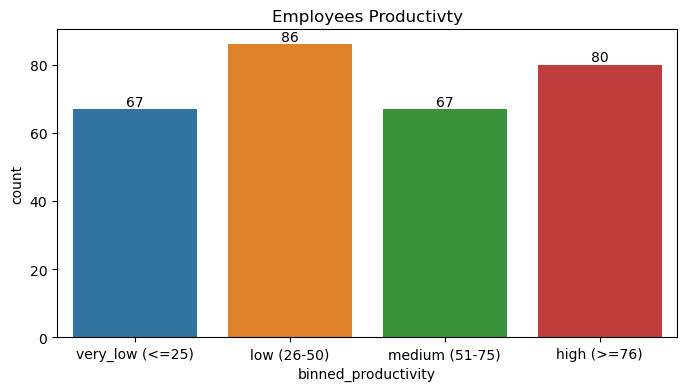

In [11]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'binned_productivity', data = df3)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
plt.title('Employees Productivty')

for i in ax.containers:
    ax.bar_label(i,)


plt.show()

We now see employees with the lowest productivity scores. We classify our productivity scores by four levels. We can conlude to drop employess that under very low category.

# Let's go deeper...

### Salary and Productivity

In [45]:
from scipy.stats import pearsonr
corr, p = pearsonr(df3['Productivity'], df3['Salary'])
corr, p

(0.017954037153537456, 0.7567892552482213)

Text(0, 0.5, 'Salary')

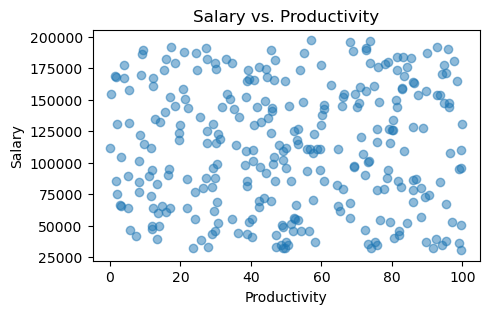

In [53]:
plt.figure(figsize = (5,3))
plt.scatter(df3['Productivity'], df3['Salary'], alpha = 0.5)
plt.title('Salary vs. Productivity')
plt.xlabel('Productivity')
plt.ylabel('Salary')

There's no correalation between productivity and salary, thus salary are based on other factors.

### Commute Time and Productivity

In [47]:
corr, p = pearsonr(df3['Commute Time'], df3['Productivity'])
corr, p

(-0.06099792430691627, 0.2923018840013438)

Text(0, 0.5, 'Productivity')

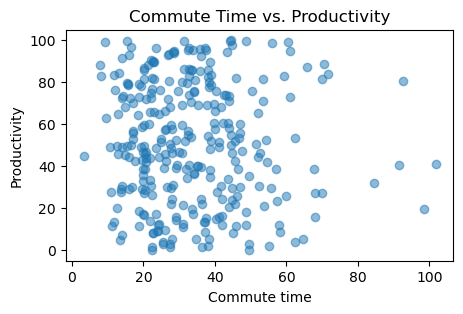

In [52]:
plt.figure(figsize = (5,3))
plt.scatter(df3['Commute Time'], df3['Productivity'], alpha = 0.5)
plt.title('Commute Time vs. Productivity')
plt.xlabel('Commute time')
plt.ylabel('Productivity')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')